## MLC FINAL PROJECT----Intelligent Building Energy Monitoring

### This notebook will examine building energy peformance based on the US commercial building energy dataset. Supervised learning approach is utilized in this report.

#### Supervised learning will predict whether the building energy consumption will exceed its benchmark line. (the US national median source EUI is used as a benchmark line here) The Sourc EUI of a specific building based on multiple continuous and categorical variables. For example: given the shape, wall_material, building type, heating and cooling equipment, whether the energy consumption of a commercial building will exceed the median bechmark line or not. The results can be used as a reference for any newly developed building to forcast the possible energy performance. 

##### IMPORT ALL PACKAGES NEEDED

In [750]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from scipy.spatial.distance import cdist,pdist
from sklearn.dummy import DummyClassifier
pd.set_option('display.max_columns', None)

### Data Cleaning

In [751]:
df = pd.read_csv("/Users/ericzhuang/Downloads/Usable data/commercial.csv")

In [752]:
df.shape

(6720, 473)

#### This dataset consists of 6720 rows and 473 columns which clearly need a comprehensive data cleaning especially with this many variables

In [753]:
# take a look at how many nan values are in the dataset
df.isna().sum()

PUBID         0
REGION        0
CENDIV        0
PBA           0
FREESTN     614
           ... 
DHCLBTU    6313
DHWTBTU    6313
DHCKBTU    6313
DHOTBTU    6313
PUBCLIM       0
Length: 473, dtype: int64

#### Some columns contain a number of na values so they need to be removed. but first of all, in order to not elimintating useful features, only columns with more than 1000 na values will be removed. 

In [754]:
# filter out columns with more than 1000 na values
na = pd.DataFrame(df.isna().sum())
na = na.rename(columns= {0 : 'na'})
na1 = na[na['na'] > 1000]
df = df.drop(columns = na1.index)

In [755]:
# data dimension
df.head(1)

,PUBID,REGION,CENDIV,PBA,FREESTN,SQFT,SQFTC,WLCNS,RFCNS,RFCOOL,RFTILT,BLDSHP,GLSSPC,EQGLSS,NFLOOR,FLCEILHT,ATTIC,YRCON0,YRCON,RENOV,RENRDC,RENCOS,RENINT,RENRFF,RENWLL,RENWIN,RENHVC,RENLGT,RENPLB,RENELC,RENINS,RENSAF,RENSTR,RENOTH,ONEACT,PBAPLUS,FACIL,GOVOWN,OWNTYPE,NOCC,OWNOCC,OWNOPR,MONUSE,OPEN24,OPNMF,OPNWE,WKHRS,NWKER,HT1,HT2,COOL,WATR,COOK,MANU,CAPGEN,GENR,ELUSED,NGUSED,FKUSED,PRUSED,STUSED,HWUSED,CWUSED,WOUSED,COUSED,SOUSED,OTUSED,HEATP,FURNAC,PKGHT,BOILER,STHW,HTPMPH,SLFCON,OTHTEQ,MAINHT,ELCOOL,COOLP,RCAC,PKGCL,CHILLR,CHWT,HTPMPC,ACWNWL,EVAPCL,OTCLEQ,MAINCL,EMCS,RDHTNF,RDCLNF,MAINT,ELWATR,WTHTEQ,ELCOOK,ELMANU,ELLOCUT,ELNONLU,ELOTSRC,ELCPLT,AMIMETER,ENRGYPLN,HWTRM,RFGEQP,PCTERM,PCTERMN,PCTRMC,LAPTPN,LAPTPC,PRNTRN,SERVER,SERVERN,SERVERC,TVVIDEO,RGSTR,COPIER,FAX,LTOHRP,LOHRPC,LTNHRP,LNHRPC,RDLTNF,FLUOR,CFLR,BULB,HALO,HID,LED,OTLT,FLUORP,SCHED,OCSN,DIM,DAYHARV,TRIM,PLGCTRL,DRLGHT,LTEXPC,PKLT,WINTYP,TINT,REFL,AWN,SKYLT,DAYLTP,HDD65,CDD65,MFBTU,MFEXP,ELCNS,ELBTU,ELEXP,DHUSED,ZMFBTU,ZMFEXP,ZELCNS,ZELEXP,ZNGCNS,ZNGEXP,ZFKCNS,ZFKEXP,ZDHCNS,ZDHEXP,MFHTBTU,MFCLBTU,MFVNBTU,MFWTBTU,MFLTBTU,MFCKBTU,MFRFBTU,MFOFBTU,MFPCBTU,MFOTBTU,ELHTBTU,ELCLBTU,ELVNBTU,ELWTBTU,ELLTBTU,ELCKBTU,ELRFBTU,ELOFBTU,ELPCBTU,ELOTBTU,PUBCLIM
0,1,2,4,26,1.0,2400,2,4,2,2,2,2.0,1.0,2.0,1,8,2,1975,1975,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,47,2,1,10,1,1.0,1,12,2,2,2,16,2,1,1,1,1,2,2,2,2,1,2,1,1,2,2,2,2,2,2,2,100.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,6.0,1.0,25.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,6.0,2.0,1.0,1.0,NaN,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,2.0,1.0,1.0,100.0,4.0,50.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,100.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,2.0,2.0,2.0,2.0,0.0,6647,1100,26934.0,892.0,6081.0,20748.0,741.0,2,2,3,0,0,9,9,2,3,9,9,5212.0,646.0,371.0,17.0,7259.0,0.0,579.0,1265.0,1471.0,10114.0,5212.0,646.0,371.0,17.0,7259.0,0.0,579.0,1265.0,1471.0,3928.0,1


#### There are 183 features left. Though this is very much better than the original dataset, there are still rooms to be improves since lots of the features are logically not related to the predictive variable or after all not important to the building energy performance. Therefore, we used some online references to determine the preliminary features that would impact the building energy perfromance which include the building wall material, building type, cooling and heating equipment, light system, operating hours, climate zone of the building etc. to perform the analysis. Since the goal is to understand the energy performance from a multi-faceted perspective, we try to look for features that are relative to the performance but distinctive from each other. 

In [756]:
# rename the columns
df = df.rename(columns = {'CENVID':'census_division','PBA':'building_activity',
                         'WLCNS':'wall_material','RFCNS':'roof_material','RFCOOL':'cool_material',
                         'RFTILT':'roof_tilt','BLDSHP':'building_shape','EQGLSS':'equal_glass_allside',
                         'NFLOOR':'num_of_floors','FLCEILHT':'floor_ceilling_height','YRCON0':'year_of_construction',
                         'RENOV':'renovations','RENRDC':'reduction_of_floorspace','RENCOS':'cosmetic_improve',
                         'RENINT':'interior_wall_ren','RENRFF':'roof_replace','RENWLL':'wall_replace',
                         'RENWIN':'window_replace','RENHVC':'hvac_replace','RENLGT':'light_replace','RENPLB':'plumbing_replace',
                         'RENELC':'electric_replace','RENINS':'insulation_upgrade','RENSAF':'fire_safety_upgrade','RENSTR':'structural_upgrade',
                         'RENOTH':'other_renovation','FACIL':'multi_building_complex','GOVOWN':'government_owned','OWNTYPE':'building_own',
                         'NOCC':'number_of_business','OWNOCC':'owner_occupied','MONUSE':'month_in_use','OPNMF':'open_during_week','OPNWE':'open_during_weekend',
                         'WKHRS':'hours_open_per_week','NWKER':'num_of_workers','ELUSED':'electricity_used','HEATP':'percent_heated','COOLP':'percent_cooled',
                         'RCAC':'Residential type central A/C','CHWT':'District chilled water piped in','HTPMPC':'Heat pumps for cooling','ACWNWL':'Individual room air conditioners',
                         'OTCLEQ':'Other cooling equipment','EMCS':'Building automation system',
                         'WTHTEQ':'Water heating equipment','ELLOCUT':'Electricity from local utility','ELCPLT':'Electricity from central plant',
                         'HWTRM':'Large amounts of hot water','RFGEQP':'Refrigeration','PCTERMN':'Number of computers','LAPTPN':'Number of laptops',
                         'PRNTRN':'Number of printers','SERVERN':'Number of servers','TVVIDEON':'Number of TV or video displays','RDLTNF':'Lighting reduced during off hours'})

In [757]:
# drop unnecessary columns
df = df.drop(columns = ['SQFTC','GLSSPC','ATTIC','YRCON','ONEACT','OWNOPR','HT1','HT2',
                       'COOL','WATR','COOK','MANU','CAPGEN','GENR','FURNAC','BOILER','STHW','HTPMPH','SLFCON','OTHTEQ',
                       'ELCOOL','PKGCL','EVAPCL','RDCLNF','MAINT','ELCOOK','ELNONLU','ELOTSRC','PCTERM','PCTRMC','LAPTPC',
                       'SERVERC','RGSTR','COPIER','FAX','LTOHRP','LOHRPC','LTNHRP','LNHRPC','FLUORP','SCHED','OCSN','DIM',
                       'DAYHARV','TRIM','PLGCTRL','DRLGHT','LTEXPC','PKLT','TINT','REFL','AWN','SKYLT','ZMFBTU','ZMFEXP',
                       'ZELCNS','DHUSED','ZELEXP','ZNGCNS','ZNGEXP','ZFKCNS','ZFKEXP','ZDHCNS','ZDHEXP','MFHTBTU','MFCLBTU','MFVNBTU','MFWTBTU','MFLTBTU','MFCKBTU','MFRFBTU','MFOFBTU','MFPCBTU','MFOTBTU','ELHTBTU','ELCLBTU','ELVNBTU','ELWTBTU','ELLTBTU','ELCKBTU','ELRFBTU','ELOFBTU','ELPCBTU','ELOTBTU'])

In [758]:
# relabel column values

df['PUBCLIM'] = df['PUBCLIM'].map({ 1 : 'Very cold/Cold',2:'Mixed-humid',
3 : 'Hot-dry/Mixed-dry/Hot-humid',
5 : 'Marine',
7 : 'Withheld to protect confidentiality'
})

df['CENDIV'] = df['CENDIV'].map({1 : 'New England',
2 : 'Middle Atlantic',
3 : 'East North Central',
4 : 'West North Central',
5 : 'South Atlantic',
6 : 'East South Central',
7 : 'West South Central',
8 : 'Mountain',
9 : 'Pacific'
})

df['building_activity'] = df['building_activity'].map({1 : 'Vacant',
2 : 'Office',
4 : 'Laboratory',
5 : 'Nonrefrigerated warehouse',
6 : 'Food sales',
7 : 'Public order and safety',
8 : 'Outpatient health care',
11 : 'Refrigerated warehouse',
12 : 'Religious worship',
13 : 'Public assembly',
14 : 'Education',
15 : 'Food service',
16 : 'Inpatient health care',
17 : 'Nursing',
18 : 'Lodging',
23 : 'Strip shopping mall',
24 : 'Enclosed mall',
25 : 'Retail other than mall',
26 : 'Service',
91 : 'Other'
})

df['wall_material'] = df['wall_material'].map({1 : 'Brick, stone, or stucco',
2 : 'Pre-cast concrete panels',
3 : 'Concrete block or poured concrete (above grade)',
4 : 'Aluminum, asbestos, plastic, or wood materials',
5 : 'Sheet metal panels',
6 : 'Window or vision glass',
7 : 'Decorative or construction glass',
8 : 'No one major type',
9 : 'Other'
})

df['WINTYP'] = df['WINTYP'].map({1 : 'Single layer glass',
2 : 'Multi-layer glass',
3 : 'Combination of both',
4 : 'No windows'
})

df['PKGHT'] = df['PKGHT'].map({1:1,2:0})

df['MAINHT'] = df['MAINHT'].map({1 : 'Furnaces',
2 : 'Packaged central unit',
3 : 'Boilers',
4 : 'District steam/hot water piped',
5 : 'Heat pumps',
6 : 'Individual space heaters',
7 : 'Other heating equipment'
})

df['MAINCL'] = df['MAINCL'].map({1 : 'Residential-type central air conditioners',
2 : 'Packaged air conditioning units',
3 : 'Central chillers',
4 : 'District chilled water piped',
5 : 'Heat pumps for cooling',
6 : 'Individual room air conditioners',
7 : 'Swamp coolers or evaporative coolers',
8 : 'Other cooling equipment'
})

df['building_shape'] = df['building_shape'].map({1 : 'Square',
2 : 'Wide rectangle',
3 : 'Narrow rectangle',
4 : 'Rectangle or square ',
5 : 'H shaped',
6 : 'U shaped',
7 : 'E shaped',
8 : 'T shaped',
9 : 'L shaped',
10 : 'cross shaped',
11 : 'Other shape'
})

df['equal_glass_allside'] = df['equal_glass_allside'].map({1.0 : 1, 2.0 : 0})
df['Building automation system'] = df['Building automation system'].map({1.0 : 1, 2.0 : 0})
df['PBAPLUS'] = df['PBAPLUS'].map({1 : 'Vacant',
2 : 'Administrative/professional office',
3 : 'Bank/other financial',
4 :'Government office',
5 :'Medical office (non-diagnostic)',
6 :'Mixed-use office',
7 :'Other office',
8 :'Laboratory',
9 :'Distribution/shipping center',
10 :'Non-refrigerated warehouse',
11 :'Self-storage',
12 :'Convenience store',
13 :'Convenience store with gas station',
14 :'Grocery store/food market',
15 :'Other food sales',
16 :'Fire station/police station',
17 :'Other public order and safety',
18 :'Medical office (diagnostic)',
19 :'Clinic/other outpatient health',
20 :'Refrigerated warehouse',
21 :'Religious worship',
22 :'Entertainment/culture',
23 :'Library',
24 :'Recreation',
25 :'Social/meeting',
26 :'Other public assembly',
27 :'College/university',
28 :'Elementary/middle school',
29 :'High school',
30 :'Preschool/daycare',
31 :'Other classroom education',
32 :'Fast food',
33 :'Restaurant/cafeteria',
34 :'Other food service',
35 :'Hospital/inpatient health',
36 :'Nursing home/assisted living',
37 :'Dormitory/fraternity/sorority',
38 :'Hotel',
39 :'Motel or inn',
40 :'Other lodging',
41 :'Vehicle dealership/showroom',
42 :'Retail store',
43 :'Other retail',
44 :'Post office/postal center',
45 :'Repair shop',
46 :'Vehicle service/repair shop',
47 :'Vehicle storage/maintenance',
48 :'Other service',
49 :'Other',
50 :'Strip shopping mall',
51 :'Enclosed mall',
52 :'Courthouse/probation office',
53 :'Bar/pub/lounge'
})

df['Number of servers'] = df['Number of servers'].replace(9995.0,500.0)

In [759]:
# using features with potential impact to energy performance
new = df[['building_activity','PBAPLUS','hours_open_per_week','SQFT','wall_material','MAINHT','MAINCL','building_shape','equal_glass_allside','PUBCLIM','num_of_workers',
   'number_of_business','Number of servers','WINTYP','PKGHT','Building automation system','MFBTU','ELBTU']].copy()

In [760]:
new.isna().sum()

building_activity               0
PBAPLUS                         0
hours_open_per_week             0
SQFT                            0
wall_material                   0
MAINHT                        534
MAINCL                        684
building_shape                614
equal_glass_allside           614
PUBCLIM                         0
num_of_workers                  0
number_of_business              0
Number of servers             239
WINTYP                          0
PKGHT                         534
Building automation system    354
MFBTU                         166
ELBTU                         166
dtype: int64

#### The recompiled dataset contains several na values, but we dont want to drop all of them so we drop them using the subsets.

In [761]:
new = new.dropna(subset=['MAINCL', 'MAINHT','building_shape','Number of servers'])
new.isna().sum()

building_activity             0
PBAPLUS                       0
hours_open_per_week           0
SQFT                          0
wall_material                 0
MAINHT                        0
MAINCL                        0
building_shape                0
equal_glass_allside           0
PUBCLIM                       0
num_of_workers                0
number_of_business            0
Number of servers             0
WINTYP                        0
PKGHT                         0
Building automation system    0
MFBTU                         0
ELBTU                         0
dtype: int64

#### Based on the domain knowledge, we have selecte the above columns to create a final dataset. But in order to perform energy benchmarking, energy usage intensity is a necessary feature but not displayed in the dataset so we have to manully calculate it. It is fairly simple: new['EUI'] = new['MFBTU'] / new['SQFT']

In [762]:
new['EUI'] = (new['MFBTU']+new['ELBTU']) / new['SQFT']

#### Now that we have the essential building energy consumption indicator, we can drop the uncessary total fuel feature.

In [763]:
new = new.drop(columns = ['MFBTU'])

In [764]:
new = new[new['building_activity'] != 'Vacant']

In [765]:
new['EUI'].describe()

count    5258.000000
mean      169.832100
std       188.276980
min         0.505333
25%        64.237320
50%       113.229671
75%       200.621137
max      1901.524667
Name: EUI, dtype: float64

In [832]:
new['PBAPLUS'].unique()

array(['Vehicle storage/maintenance', 'Strip shopping mall', 'Hotel',
       'Mixed-use office', 'Hospital/inpatient health',
       'Administrative/professional office', 'Government office',
       'Repair shop', 'High school', 'Elementary/middle school',
       'Other office', 'Recreation', 'Distribution/shipping center',
       'Medical office (diagnostic)', 'Retail store', 'Religious worship',
       'Social/meeting', 'Fire station/police station',
       'Grocery store/food market', 'Medical office (non-diagnostic)',
       'Fast food', 'Other classroom education', 'Preschool/daycare',
       'Non-refrigerated warehouse', 'Bank/other financial',
       'Other service', 'Other public assembly', 'Self-storage',
       'Laboratory', 'Restaurant/cafeteria', 'Other retail',
       'Motel or inn', 'Library', 'Vehicle service/repair shop',
       'Post office/postal center', 'Nursing home/assisted living',
       'Bar/pub/lounge', 'Enclosed mall', 'College/university', 'Other',
       'C

#### Creating a columns for classification task is the most important step in this research. I do this by the following steps: separate all the building activity as a single dataset. Then create a empty binary column of 1s and 0s. The binary value is 1 when the building sourceEUI is greater than the median benchmark line of its category. The binary value is 0 when the building sourceEUI is smaller than the median benchmark line of its category. The median energy usage intensity is reported by the energy star porfolio manager

In [833]:
new_service = new[new['building_activity'] == 'Service']
new_service['more_than_median'] = [1 if x > 96.9 else 0 for x in new_service['EUI']]

new_strip = new[new['building_activity'] == 'Strip shopping mall']
new_strip['more_than_median'] = [1 if x > 228.8 else 0 for x in new_strip['EUI']]

new_office = new[new['building_activity'] == 'Office']
new_office['more_than_median'] = [1 if x > 116.4 else 0 for x in new_office['EUI']]

new_Inpatient = new[new['PBAPLUS'] == 'Hospital/inpatient health']
new_Inpatient['more_than_median'] = [1 if x > 433.9 else 0 for x in new_Inpatient['EUI']]

new_othereducation = new[new['PBAPLUS'] == 'Other classroom education']
new_othereducation['more_than_median'] = [1 if x > 110.4 else 0 for x in new_othereducation['EUI']]

new_hotel = new[new['PBAPLUS'] == 'Hotel']
new_hotel['more_than_median'] = [1 if x > 146.7 else 0 for x in new_hotel['EUI']]

new_high = new[new['PBAPLUS'] == 'High school']
new_high['more_than_median'] = [1 if x > 104.4 else 0 for x in new_high['EUI']]

new_elem = new[new['PBAPLUS'] == 'Elementary/middle school']
new_elem['more_than_median'] = [1 if x > 104.4 else 0 for x in new_elem['EUI']]

new_medical = new[new['PBAPLUS'] == 'Medical office']
new_medical['more_than_median'] = [1 if x > 121.7 else 0 for x in new_medical['EUI']]

new_recreation = new[new['PBAPLUS'] == 'Recreation']
new_recreation['more_than_median'] = [1 if x > 112.0 else 0 for x in new_recreation['EUI']]

new_dist = new[new['PBAPLUS'] == 'Distribution/shipping center']
new_dist['more_than_median'] = [1 if x > 52.9 else 0 for x in new_dist['EUI']]

new_retail = new[new['PBAPLUS'] == 'Retail store']
new_retail['more_than_median'] = [1 if x > 120.0 else 0 for x in new_retail['EUI']]

new_relig = new[new['PBAPLUS'] == 'Religious worship']
new_relig['more_than_median'] = [1 if x > 58.4 else 0 for x in new_relig['EUI']]

new_soci = new[new['PBAPLUS'] == 'Social/meeting']
new_soci['more_than_median'] = [1 if x > 109.6 else 0 for x in new_soci['EUI']]

new_polic = new[new['PBAPLUS'] == 'Fire station/police station']
new_polic['more_than_median'] = [1 if x > 124.9 else 0 for x in new_polic['EUI']]

new_groc = new[new['PBAPLUS'] == 'Grocery store/food market']
new_groc['more_than_median'] = [1 if x > 444.0 else 0 for x in new_groc['EUI']]

new_fast = new[new['PBAPLUS'] == 'Fast food']
new_fast['more_than_median'] = [1 if x > 886.4 else 0 for x in new_fast['EUI']]

new_pre = new[new['PBAPLUS'] == 'Preschool/daycare']
new_pre['more_than_median'] = [1 if x > 131.5 else 0 for x in new_pre['EUI']]

new_nonref = new[new['PBAPLUS'] == 'Non-refrigerated warehouse']
new_nonref['more_than_median'] = [1 if x > 47.8 else 0 for x in new_nonref['EUI']]

new_bank = new[new['PBAPLUS'] == 'Bank/other financial']
new_bank['more_than_median'] = [1 if x > 209.9 else 0 for x in new_bank['EUI']]

new_lab = new[new['PBAPLUS'] == 'Laboratory']
new_lab['more_than_median'] = [1 if x > 318.2 else 0 for x in new_lab['EUI']]

new_rest = new[new['PBAPLUS'] == 'Restaurant/cafeteria']
new_rest['more_than_median'] = [1 if x > 573.7 else 0 for x in new_rest['EUI']]

new_motel = new[new['PBAPLUS'] == 'Motel or inn']
new_motel['more_than_median'] = [1 if x > 146.7 else 0 for x in new_motel['EUI']]

new_lib = new[new['PBAPLUS'] == 'Library']
new_lib['more_than_median'] = [1 if x > 143.6 else 0 for x in new_lib['EUI']]

new_post = new[new['PBAPLUS'] == 'Post office/postal center']
new_post['more_than_median'] = [1 if x > 96.9 else 0 for x in new_post['EUI']]

new_bar = new[new['PBAPLUS'] =='Bar/pub/lounge']
new_bar['more_than_median'] = [1 if x > 297.0 else 0 for x in new_bar['EUI']]

new_mall = new[new['PBAPLUS'] =='Enclosed mall']
new_mall['more_than_median'] = [1 if x > 170.7 else 0 for x in new_mall['EUI']]

new_univ = new[new['PBAPLUS'] =='College/university']
new_univ['more_than_median'] = [1 if x > 180.6 else 0 for x in new_univ['EUI']]

new_conve = new[new['PBAPLUS'] =='Convenience store']
new_conve['more_than_median'] = [1 if x > 592.6 else 0 for x in new_conve['EUI']]

new_court = new[new['PBAPLUS'] =='Courthouse/probation office']
new_court['more_than_median'] = [1 if x > 211.4 else 0 for x in new_court['EUI']]

new_clinic = new[new['PBAPLUS'] =='Clinic/other outpatient health']
new_clinic['more_than_median'] = [1 if x > 145.8 else 0 for x in new_clinic['EUI']]

new_dorm = new[new['PBAPLUS'] == 'Dormitory/fraternity/sorority']
new_dorm['more_than_median'] = [1 if x > 107.5 else 0 for x in new_dorm['EUI']]

new_ref = new[new['PBAPLUS'] == 'Refrigerated warehouse']
new_ref['more_than_median'] = [1 if x > 235.6 else 0 for x in new_ref['EUI']]

new_other_food = new[new['PBAPLUS'] == 'Other food service']
new_other_food['more_than_median'] = [1 if x > 527.7  else 0 for x in new_other_food['EUI']]

new_dealer = new[new['PBAPLUS'] == 'Vehicle dealership/showroom']
new_dealer['more_than_median'] = [1 if x > 124.1 else 0 for x in new_dealer['EUI']]

/Users/ericzhuang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ericzhuang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/ericzhuang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

#### Concatenate all datasets together

In [768]:
new_list = [new_dealer, new_other_food, new_ref, new_dorm, new_clinic, new_court, new_conve, new_univ
           , new_mall,new_bar,new_post, new_lib,new_motel, new_rest, new_lab,new_bank, new_nonref, new_pre,
           new_fast,new_groc, new_polic, new_soci, new_relig, new_retail, new_dist, new_recreation, new_medical,
           new_elem, new_high, new_hotel, new_othereducation, new_Inpatient,new_office, new_strip, new_service]

In [769]:
new_concat = pd.concat(new_list, ignore_index=True)

In [799]:
new_concat['more_than_median'].value_counts()

0.0    3075
1.0    1839
Name: more_than_median, dtype: int64

### Exploratory analysis

#### We are interested to see how different types of building consume energy every year. So the first set of EDA is to understand the basic information of building type

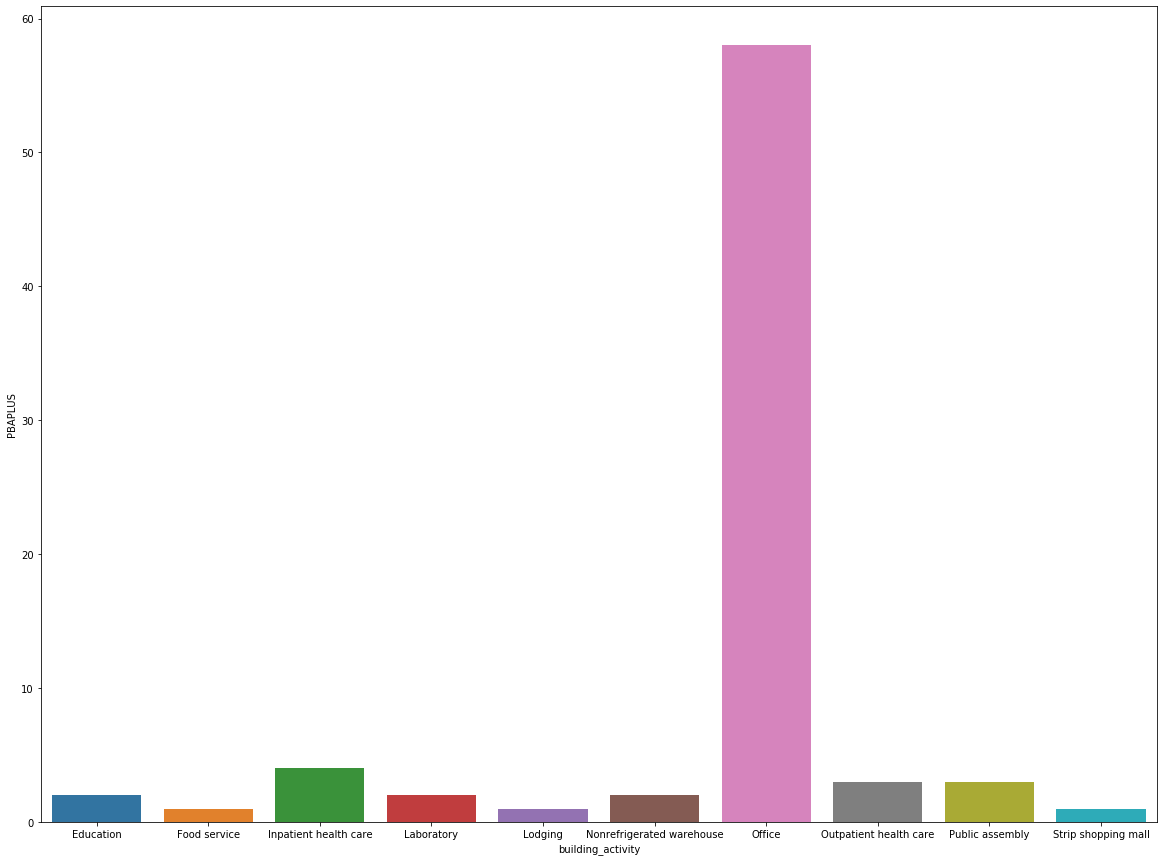

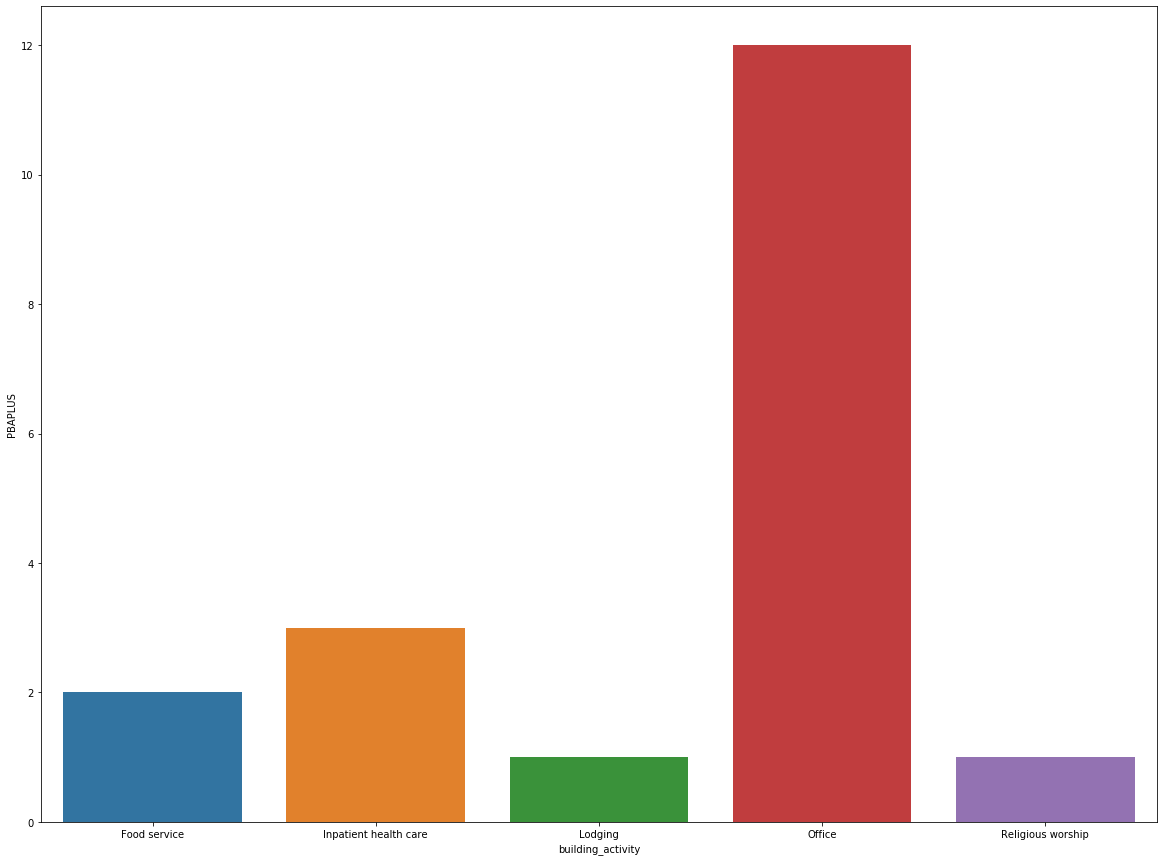

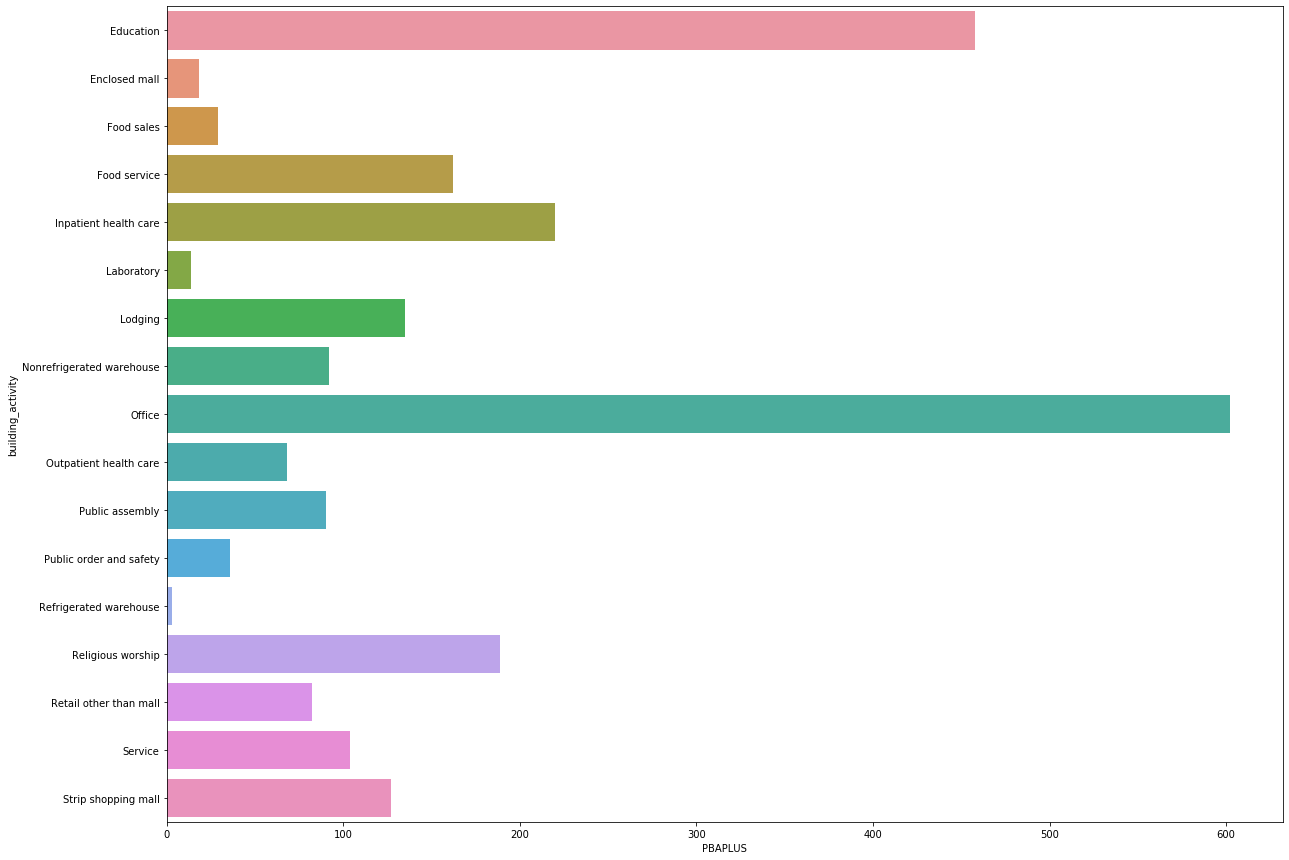

In [819]:
window = new_concat[new_concat['wall_material'] == 'Window or vision glass']
window = window.groupby(['building_activity']).count().reset_index()
fig_dims = (20,15)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="building_activity", y='PBAPLUS', data=window)

window = new_concat[new_concat['wall_material'] == 'Decorative or construction glass']
window = window.groupby(['building_activity']).count().reset_index()
fig_dims = (20,15)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="building_activity", y='PBAPLUS', data=window)

window = new_concat[new_concat['wall_material'] == 'Brick, stone, or stucco']
window = window.groupby(['building_activity']).count().reset_index()
fig_dims = (20,15)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x='PBAPLUS', y="building_activity", data=window)

In [635]:
# building type proportion
bd_type = new_concat.groupby(['building_activity']).count()
bd_type['proportion'] = bd_type['SQFT']/bd_type['SQFT'].sum()

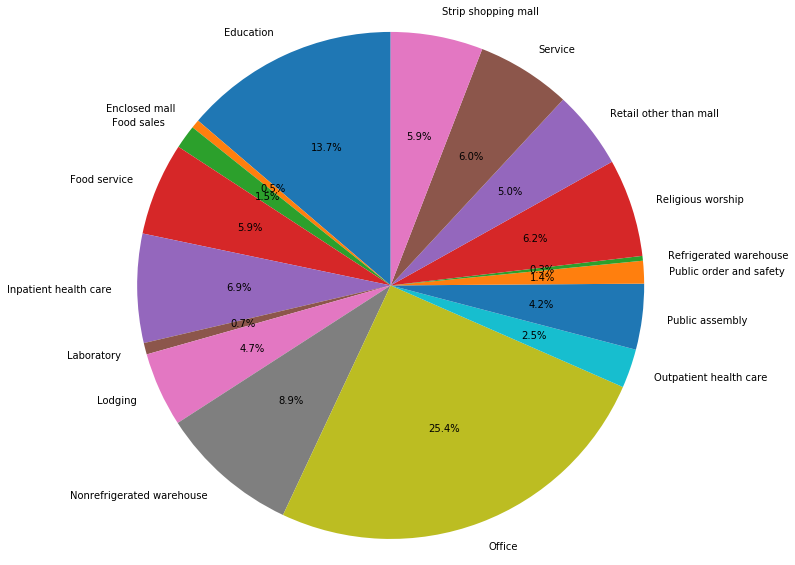

In [636]:
# pie chart
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(bd_type['proportion'], labels=bd_type.index, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax.axis('equal')
plt.show()

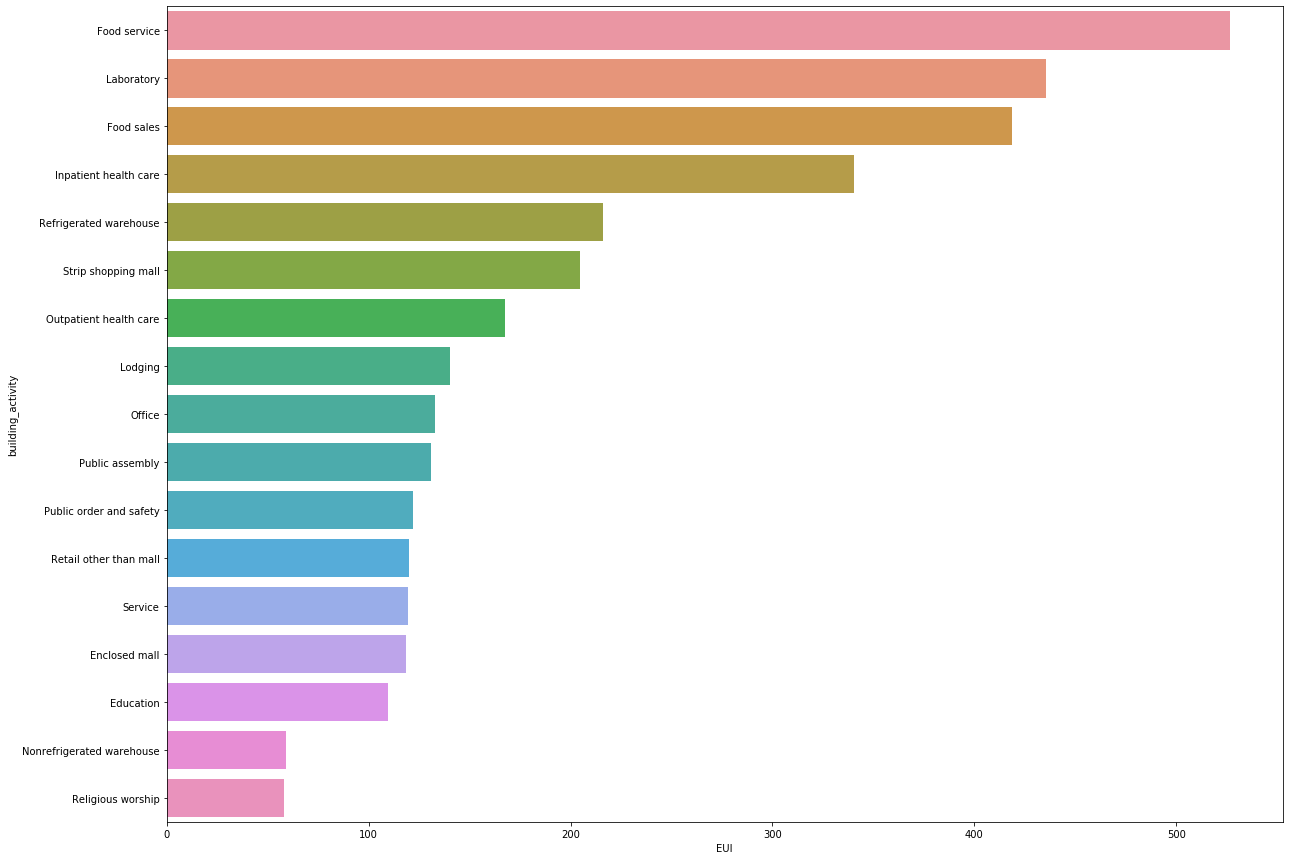

In [774]:
eui = new_concat.groupby(['building_activity']).mean().reset_index()
eui = eui.sort_values('EUI', ascending = False)
fig_dims = (20,15)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="EUI", y="building_activity", data=eui)

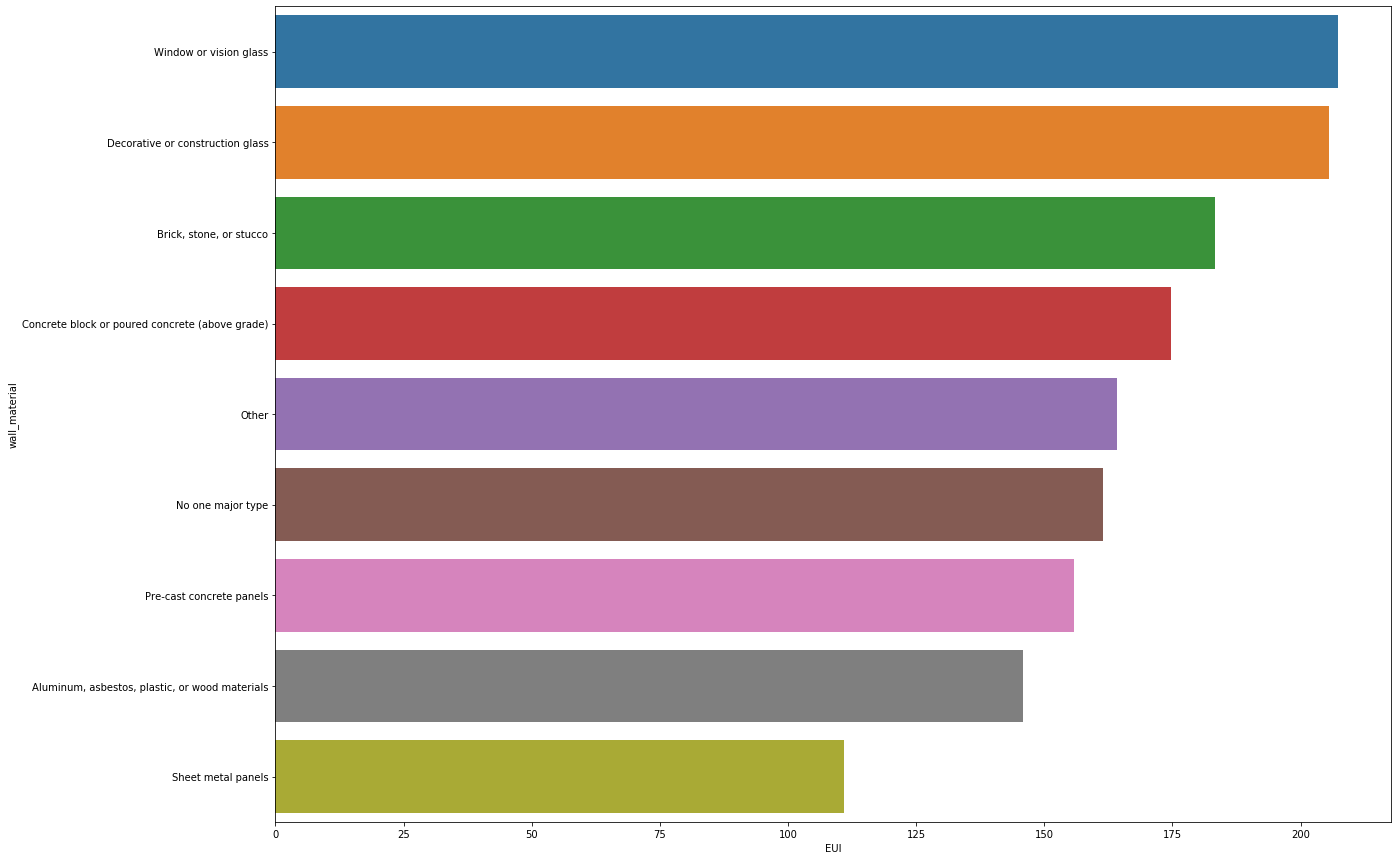

In [638]:
# EUI by wall material
wall = new.groupby(['wall_material']).mean().reset_index()
wall = wall.sort_values('EUI', ascending = False)
fig_dims = (20,15)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="EUI", y="wall_material", data=wall)

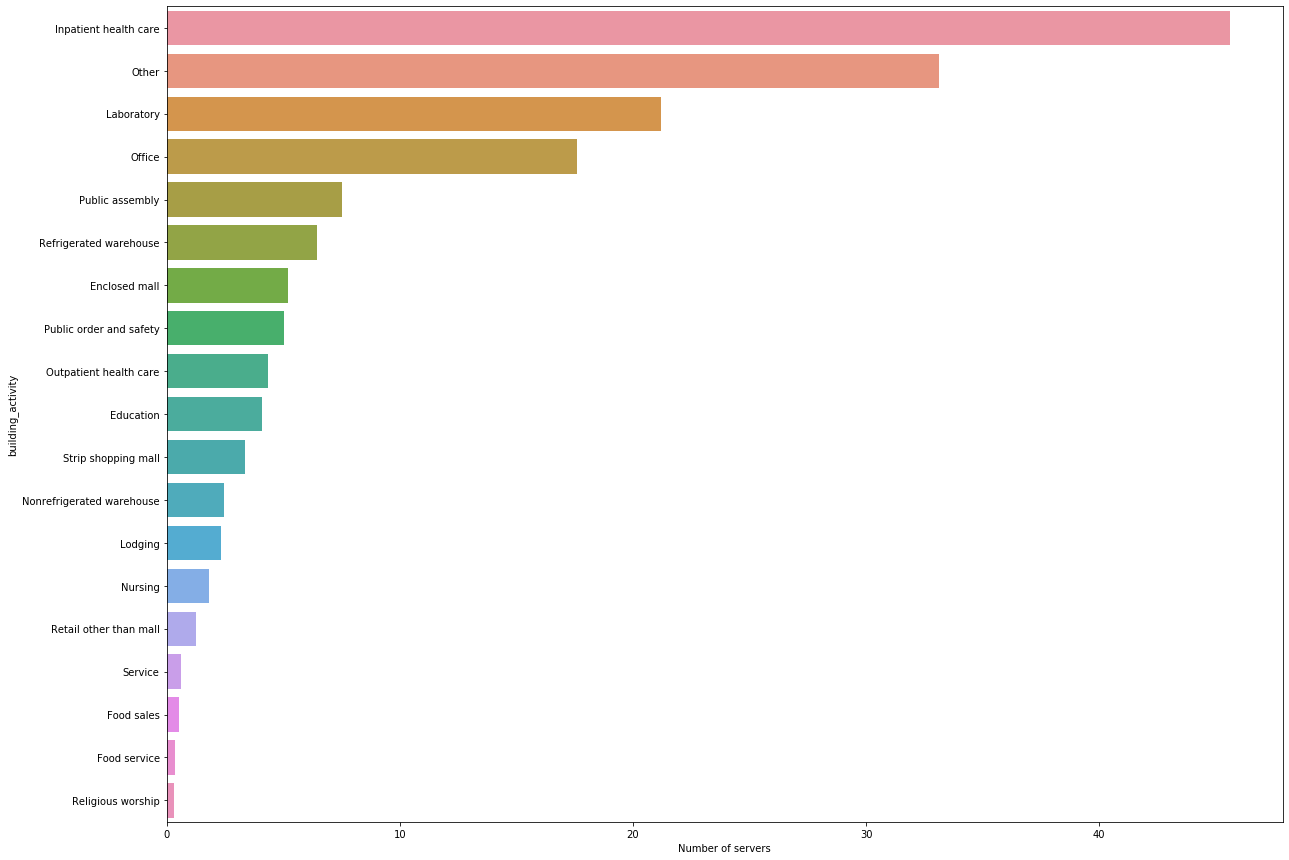

In [778]:
# which type of building use the most servers
new['Number of servers'] = new['Number of servers'].astype(int)
server = new.groupby(['building_activity']).mean().reset_index()

server = server.sort_values('Number of servers', ascending = False)
fig_dims = (20,15)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="Number of servers", y="building_activity", data=server)

### Which industry is more likely to have over_average energy consumption

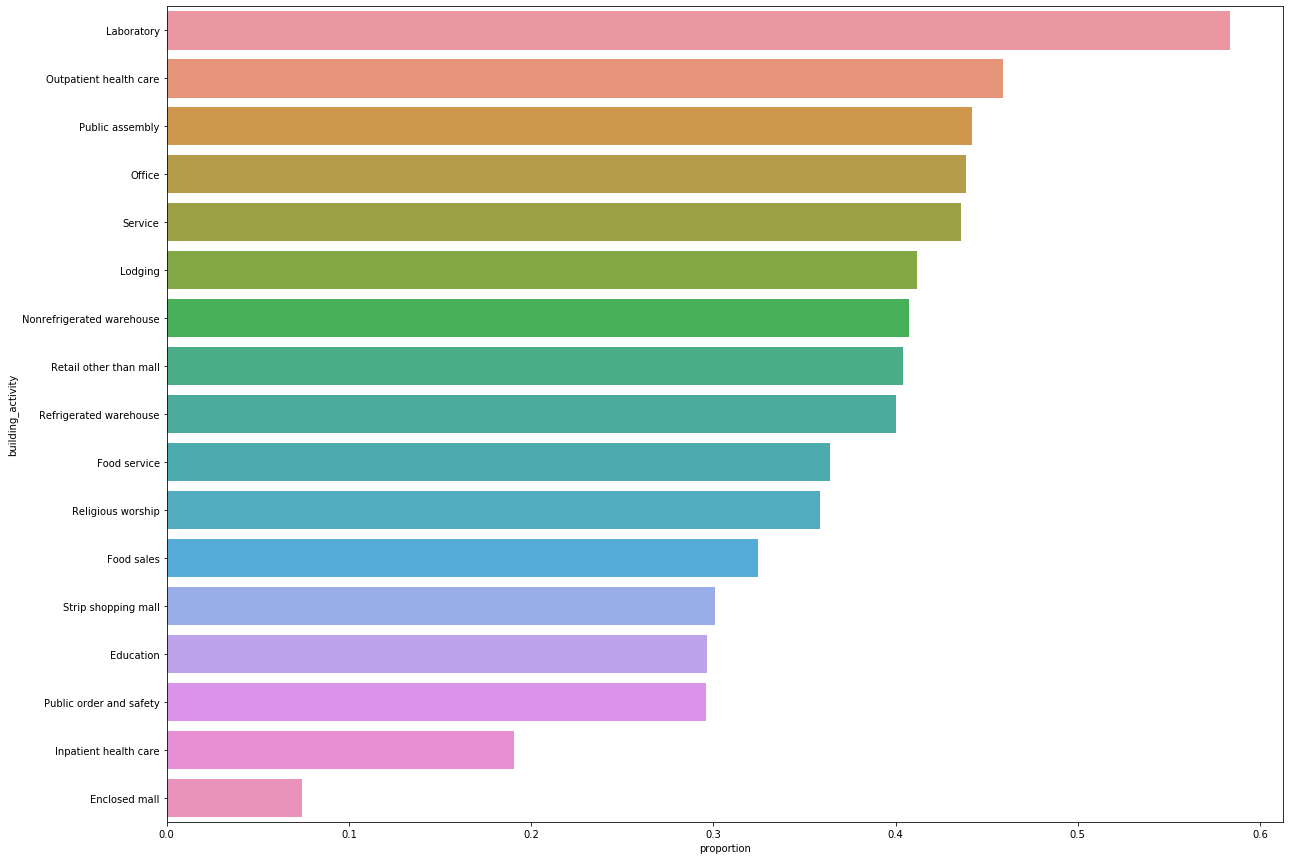

In [640]:
new_group = new_concat.groupby('building_activity').sum()
X = pd.DataFrame(new_group['more_than_median'] / bd_type['SQFT'])
X = X.rename(columns = {0 : 'proportion'})
X = X.reset_index()
X = X.sort_values('proportion', ascending = False)
fig_dims = (20,15)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="proportion", y="building_activity", data=X)

### mean encoding

#### this method is implemented because it reduces the dimentionality of the dataset and increase the variable interprebility. In a general sense, mean encoding is to calculate the number of true target under a certain feature divided by the total target under that feature. It is tailored for classification tasks. 

In [641]:
def mean_encoding(df):   
    cols = ['wall_material','MAINHT','MAINCL','building_shape','PUBCLIM','WINTYP','building_activity']
    for col in cols:
        mean = df['more_than_median'].mean()
        agg = df.groupby(col)['more_than_median'].agg(['count','mean'])
        counts = agg['count']
        means = agg['mean']
        weight = 100
        smooth = (counts * means + weight * mean) / (counts + weight)
        df.loc[:,col+'_'] = df[col].map(smooth)
        
    return df

In [642]:
mean = mean_encoding(new_concat)

In [643]:
mean_encoding = mean.drop(columns = ['EUI','ELBTU','building_activity', 'PBAPLUS','wall_material','MAINHT','MAINCL','building_shape','PUBCLIM','WINTYP'])

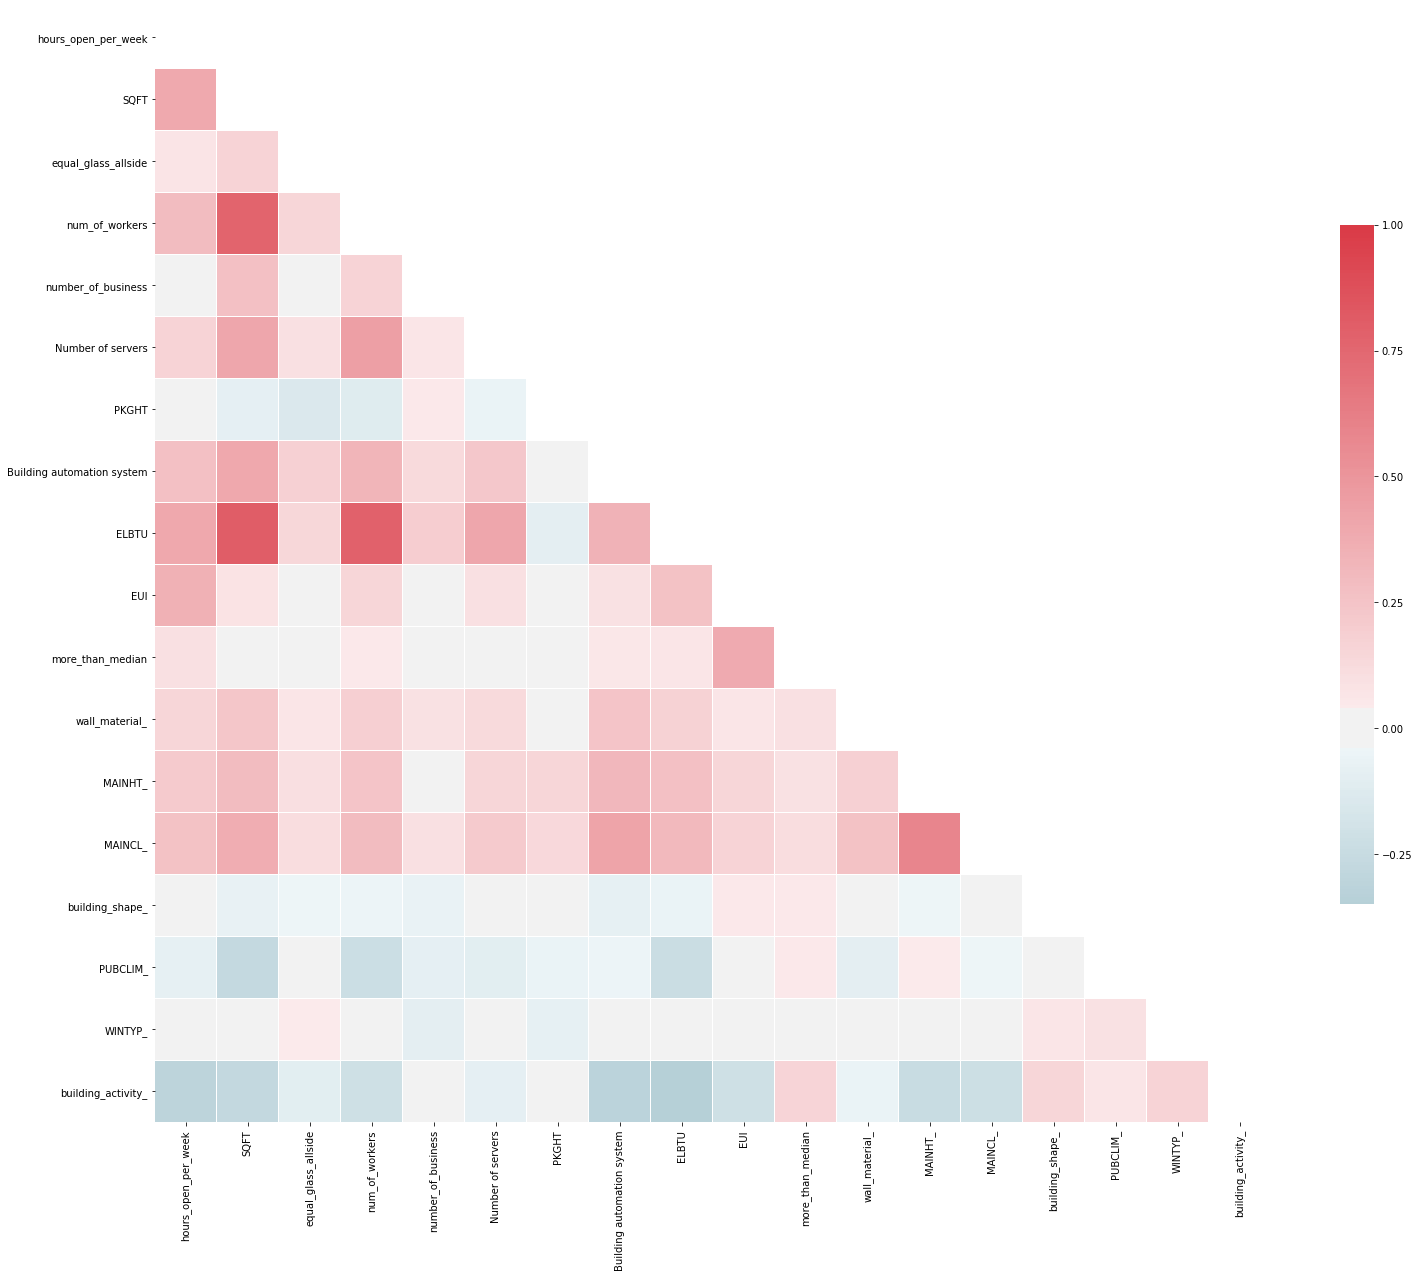

In [644]:
corr = mean.corr()
f, ax = plt.subplots(figsize=(25, 25))
# Generate a custom diverging colormap
mask = np.triu(np.ones_like(corr))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Preparing initial train test dataset

In [649]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=19)

### Set up baseline accuracy

In [650]:
dummy = DummyClassifier(strategy='uniform', random_state=1)
dummy.fit(X_train, Y_train)

dummy.score(X_test, Y_test)

0.5110974106041923

### Random forest classifier with randomized search cross validation with 3 folds

In [729]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 500, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,Y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   59.6s
/Users/ericzhuang/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  4.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [739]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [741]:
clf = RandomForestClassifier(n_estimators = 1000,
 min_samples_split = 5,
 min_samples_leaf = 2,
 max_features = 'sqrt',
 max_depth = 10,
 bootstrap = True)
# Train the model on training data
clf.fit(X_train,Y_train)
# Use the forest's predict method on the test data
y_pred = clf.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))
print('In sample accuracy:',clf.score(X_train,Y_train))
print('Out of sample accuracy:',clf.score(X_test,Y_test))

[[875 129]
 [409 209]]
              precision    recall  f1-score   support

         0.0       0.68      0.87      0.76      1004
         1.0       0.62      0.34      0.44       618

    accuracy                           0.67      1622
   macro avg       0.65      0.60      0.60      1622
weighted avg       0.66      0.67      0.64      1622

In sample accuracy: 0.8198663426488457
Out of sample accuracy: 0.6683107274969173


In [829]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(clf.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]
# list the top 5 most important features in order
Feature_importance = Feature_importance.sort_values(by="importance",ascending=False)

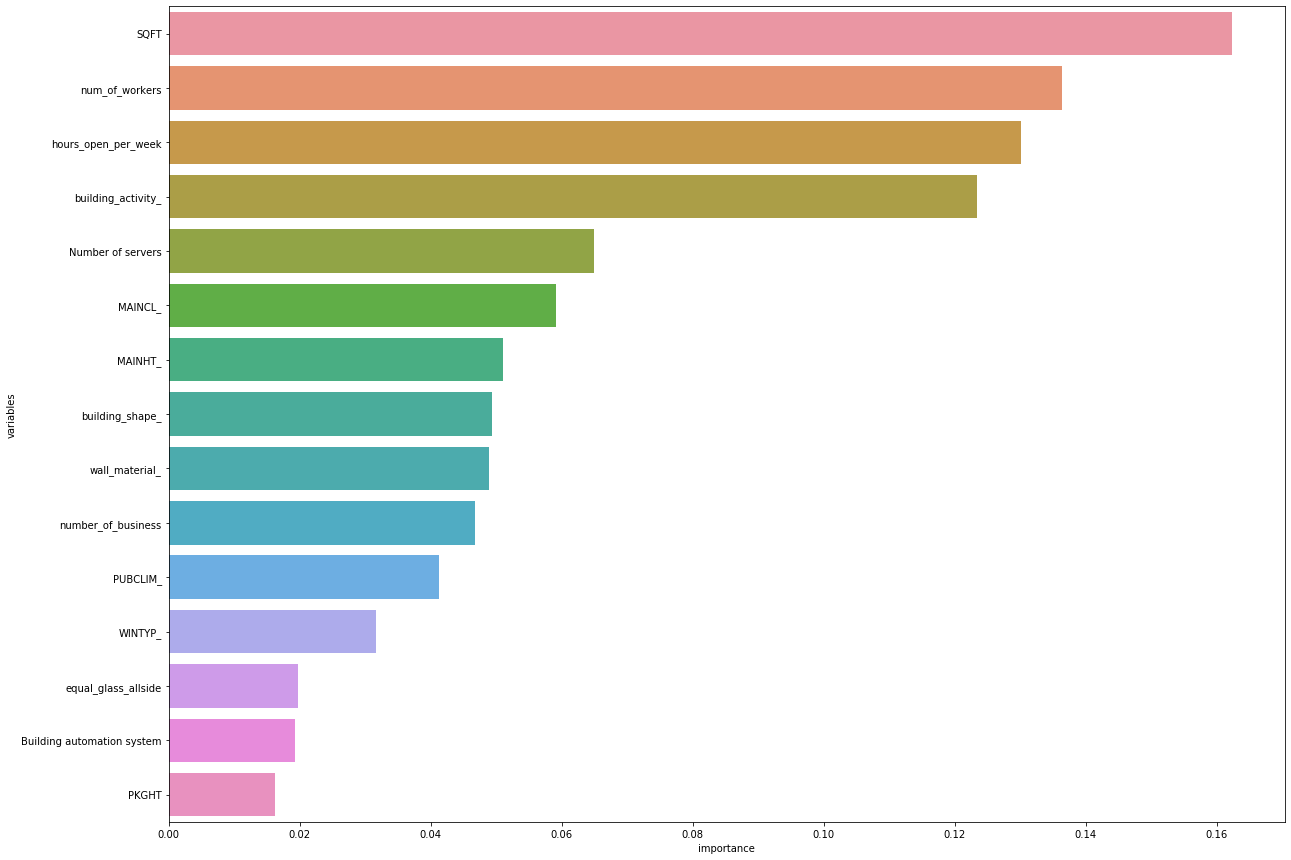

In [830]:
fig_dims = (20,15)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="importance", y="variables", data=Feature_importance)

### adaboost

In [749]:
regr = AdaBoostClassifier(random_state=0, n_estimators=500)
regr.fit(X_train, Y_train)
y_pred = regr.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

print('In sample accuracy:',regr.score(X_train,Y_train))
print('Out of sample accuracy:',regr.score(X_test,Y_test))

[[819 185]
 [360 258]]
              precision    recall  f1-score   support

         0.0       0.69      0.82      0.75      1004
         1.0       0.58      0.42      0.49       618

    accuracy                           0.66      1622
   macro avg       0.64      0.62      0.62      1622
weighted avg       0.65      0.66      0.65      1622

In sample accuracy: 0.7399756986634265
Out of sample accuracy: 0.6639950678175093


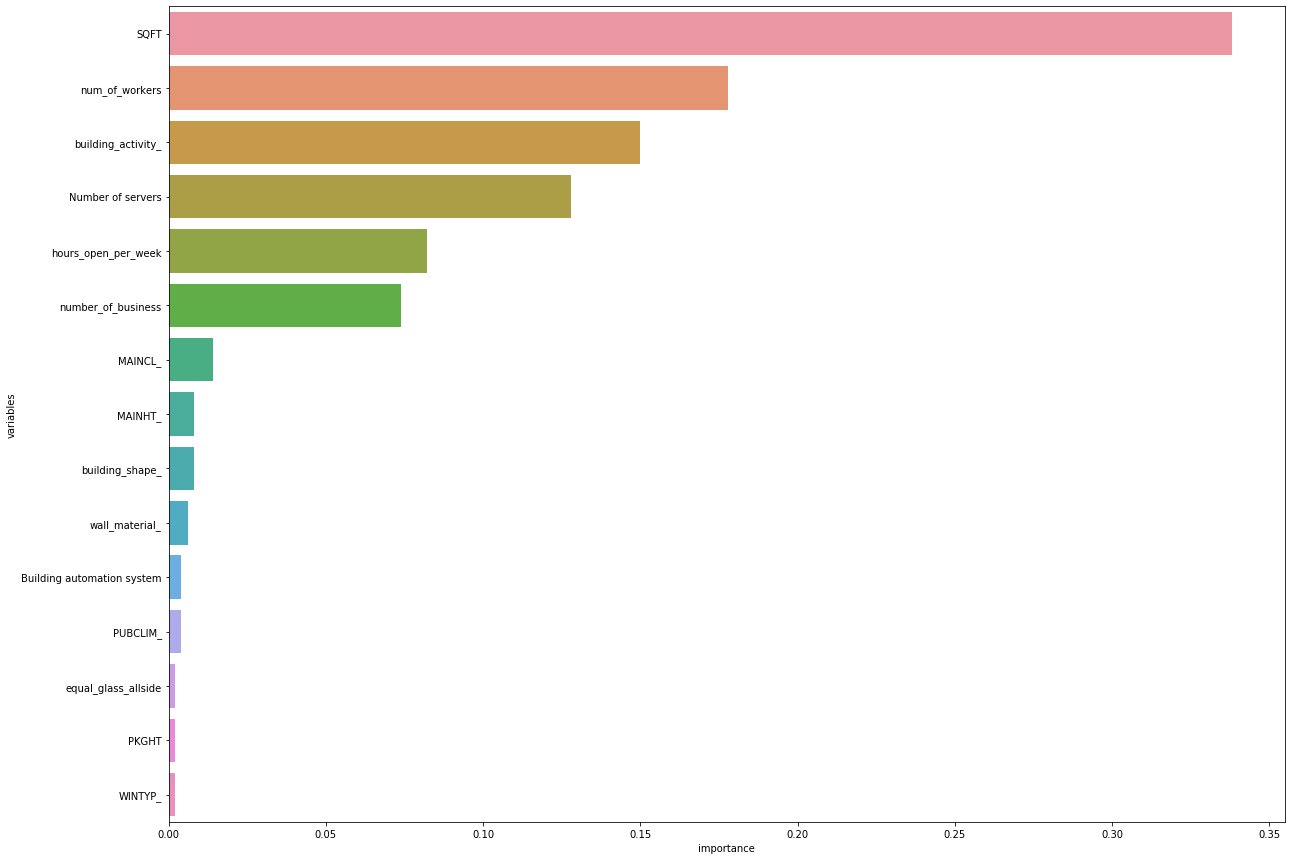

In [831]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(regr.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]
# list the top 5 most important features in order
Feature_importance = Feature_importance.sort_values(by="importance",ascending=False)
fig_dims = (20,15)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="importance", y="variables", data=Feature_importance)

In [696]:
XX = X_train[['SQFT','num_of_workers','building_activity_','Number of servers','hours_open_per_week','MAINCL_']]
XXX = X_test[['SQFT','num_of_workers','building_activity_','Number of servers','hours_open_per_week','MAINCL_']]

In [697]:
clf = RandomForestClassifier(n_estimators=1000, max_depth=700, max_leaf_nodes=100, random_state=0)
# Train the model on training data
clf.fit(XX,Y_train)
# Use the forest's predict method on the test data
y_pred = clf.predict(XXX)
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))
print(accuracy_score(Y_test, y_pred))

[[863 141]
 [403 215]]
              precision    recall  f1-score   support

         0.0       0.68      0.86      0.76      1004
         1.0       0.60      0.35      0.44       618

    accuracy                           0.66      1622
   macro avg       0.64      0.60      0.60      1622
weighted avg       0.65      0.66      0.64      1622

0.6646115906288532


In [698]:
regr = AdaBoostClassifier(random_state=0, n_estimators=500)
regr.fit(XX, Y_train)
y_pred = regr.predict(XXX)
print(accuracy_score(y_pred,Y_test))

0.6664611590628853
